In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Data Processing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Basic DataViz tools
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_palette('husl')

plt.rc('figure', figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots

# Special Visualization
import wordcloud, missingno
from wordcloud import WordCloud
import missingno as msno
import networkx as nx



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


## Importando os Dados

<p>Esse dataset é composto dos top 50 BestSellers do site da Amazon no periodo de 2010 - 2019.</p>
<p>O objetivo dessa analise é explorar o dataset e criar visualizações para obtermos insights, nosso primeiro passo é efetuar a importação do dataset para o documento</p>

In [2]:
# Para efetuar a importação e leitura do dataset, estou utilizando a bibliotéca Pandas, e para conferir se a importação obteve sucesso utilizo o metodo .head() para me mostrar as primeiras 5 linhas.

first_import = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
first_import.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Gerando um resumo estatistico de nosso dataset.

Para conhecermos melhor esse conjunto de dados, abaixo utilizo o método describe() para efetuar algumas operações básicas nas colunas.

In [3]:
first_import.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


## Usando um For Loop para verificar se o dataset possui possui alguma coluna faltando valores.

Como esse é um dataset novo para mim, decido primeiramente checar se ele está completo ou se está faltand alguns dados. Por questão de prática utilizo uma estrutura de repetição para checar todas as colunas de nosso conjunto de dados.

In [4]:
for col in first_import.columns:
    pct_missing = np.mean(first_import[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Name - 0.0%
Author - 0.0%
User Rating - 0.0%
Reviews - 0.0%
Price - 0.0%
Year - 0.0%
Genre - 0.0%


## Usando a biblioteca Missingno para fazer a mesma checagem acima.

Decido também utilizar a biblioteca Missingno para checar se há dados faltando.

<AxesSubplot:>

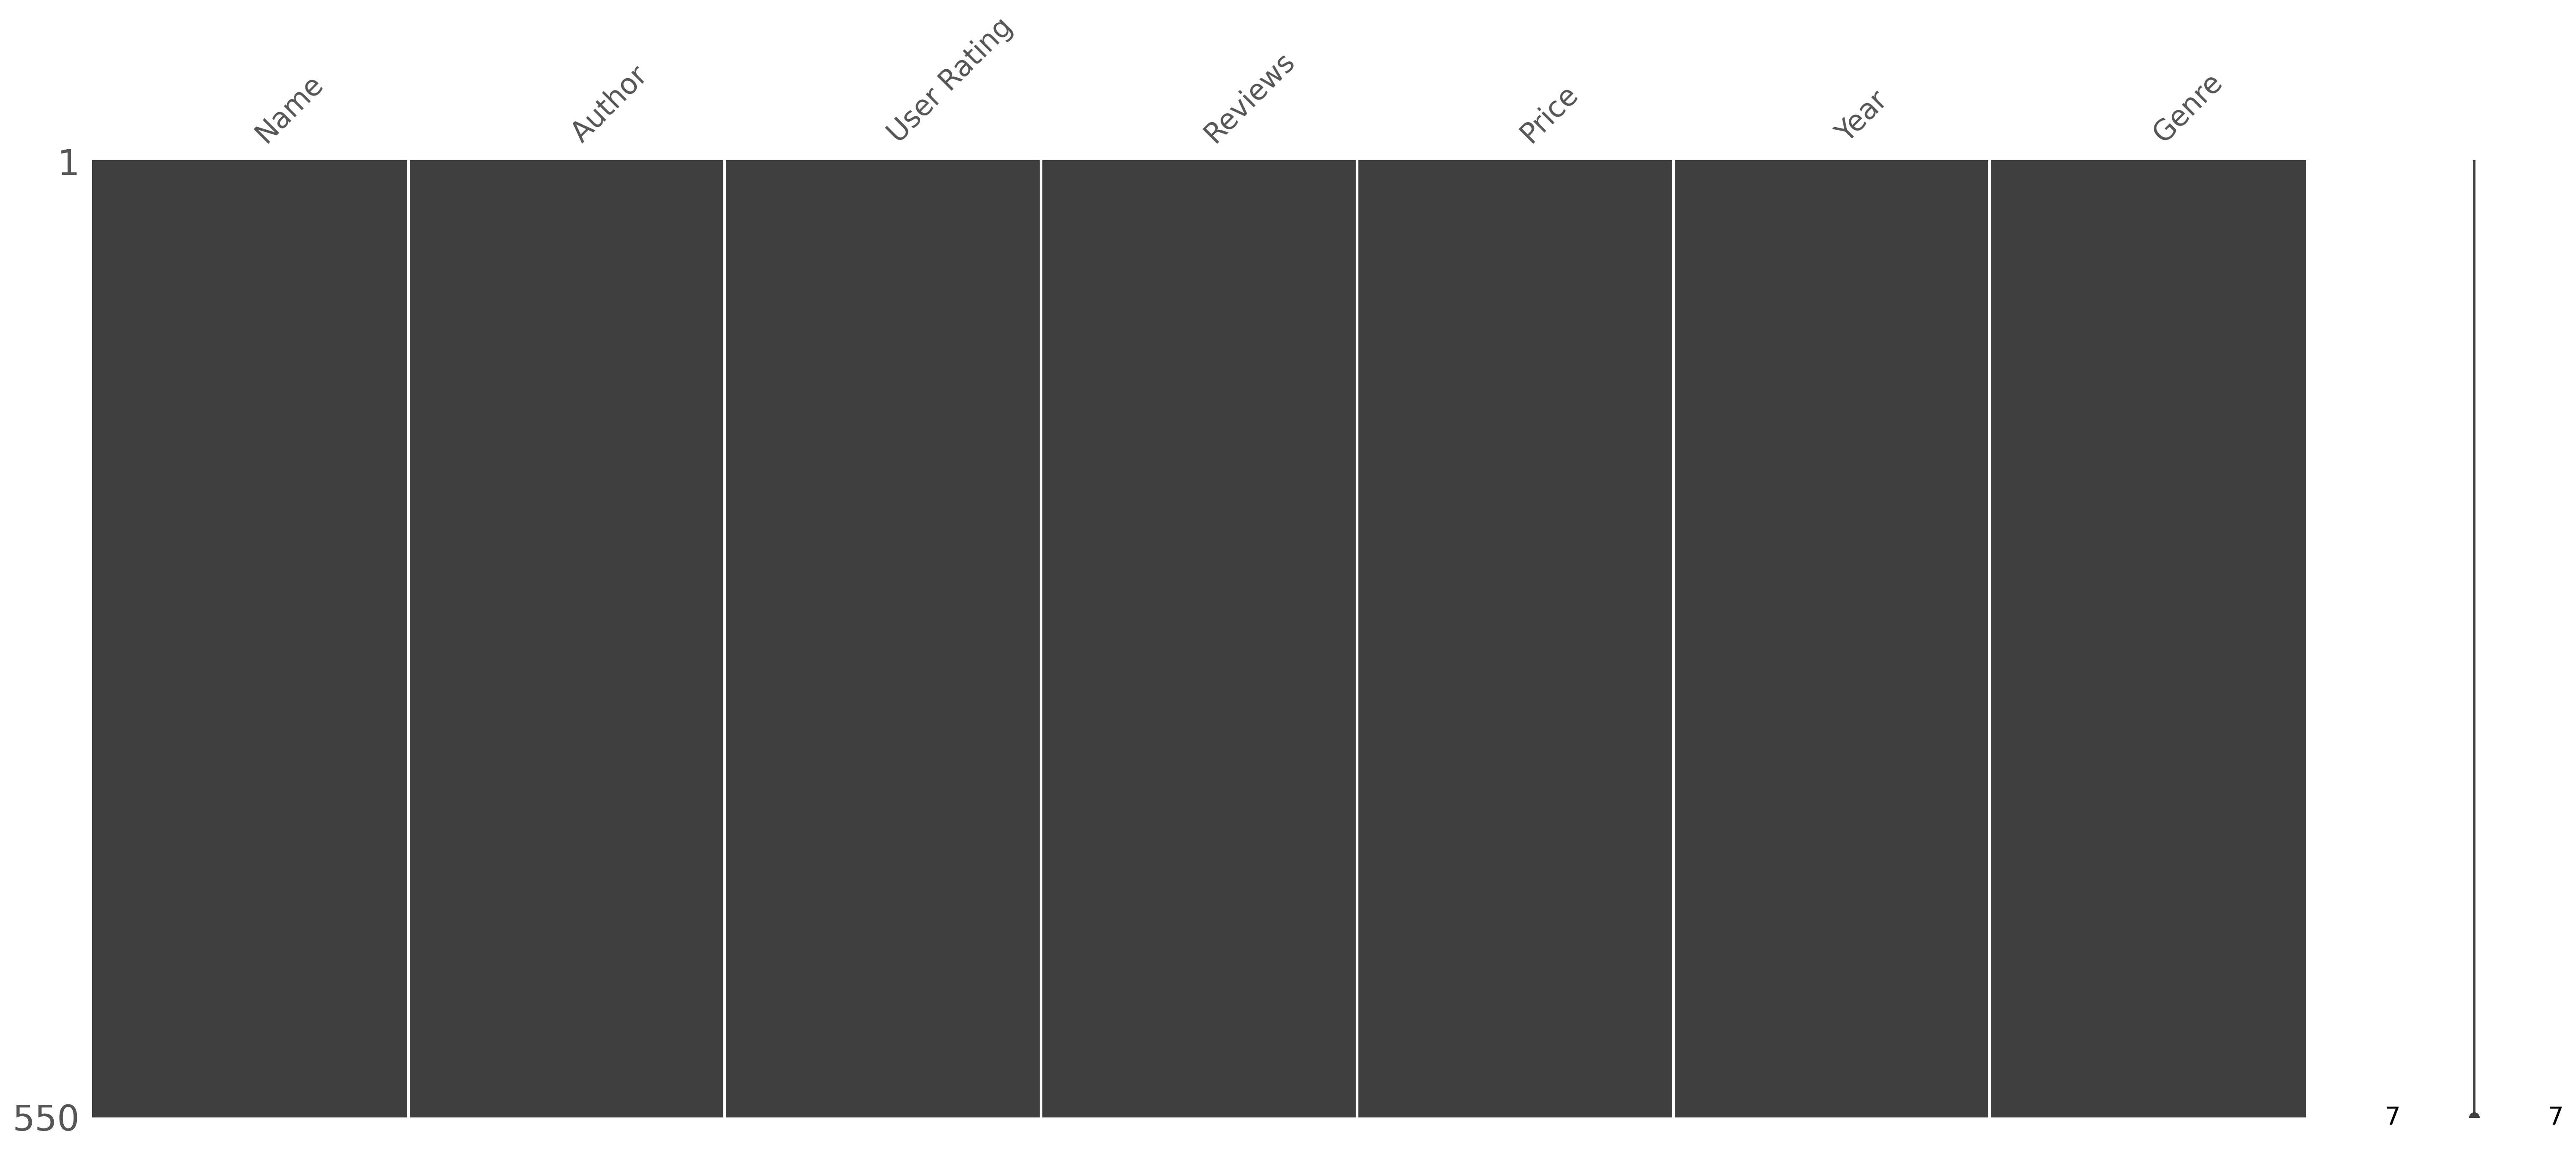

In [5]:
msno.matrix(first_import)

### Tanto a estrutura de repetição quanto o gráfico acima mostram que esse dataset não possui dados faltando.

## Como o dataset não está faltando dados, começo primeiro a olhar para os livros com o melhor User Rating e que também possua muitas Reviews


In [6]:
first_import.sort_values(['User Rating', 'Reviews'], ascending=[False, False])

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
...,...,...,...,...,...,...,...
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


## Decido também criar uma visualização da distribuição das notas das avaliações, para identificar onde está sua maioria.

In [7]:
temp_df = first_import['User Rating'].value_counts().reset_index()

# Creating trace1
trace1 = go.Bar(x = temp_df['index'], 
                y = temp_df['User Rating'],
                marker = dict(color = 'rgb(255, 165, 0)',
                             line = dict(color='rgb(0,0,0)', width=1.5)))

layout = go.Layout(template = 'plotly_dark',
                   title = 'Ratings Count', 
                   xaxis = dict(title = "Rating"),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data = [trace1], layout = layout)
fig.show()

## Podemos usar também um Pie Chart para ver essa distribuição.

In [8]:
# Função para criar o pie chart usando a biblioteca Plotly.

def pie_plot(cnt_srs, title):
        labels=cnt_srs.index
        values=cnt_srs.values
        trace = go.Pie(labels=labels,
                   values=values,
                   title=title,
                   hoverinfo='percent+value',
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                              line=dict(color='#000000', width=2),
                              )
                  )
        return trace
    
py.iplot([pie_plot(first_import['User Rating'].value_counts(), 'Rating')])

## Podemos observar que a maior parte dos Ratings está entre 4.6 à 4.8

## Podemos ir um pouco mais a fundo e verificar a relação entre o Preço e o User Rating.


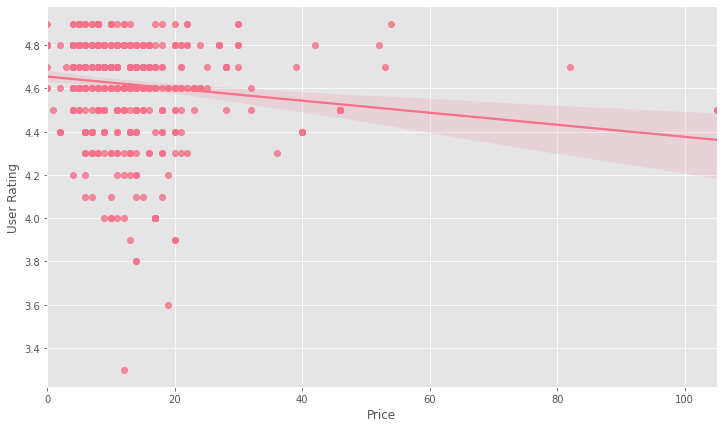

In [9]:
fig, ax= plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=first_import, x='Price', y='User Rating', ax=ax)
plt.show()

## Com a visualização acima podemos definir duas conclusões.

* Vemos que User Rating tende a mostrar uma pequena correlação negativa quando comparado o preço dos livros.
* A maioria dos livros desse dataset está sendo comercializado a um preço menor que $50.00.

## Podemos então verificar a relação entre Preço e a quantidade de Reviews.

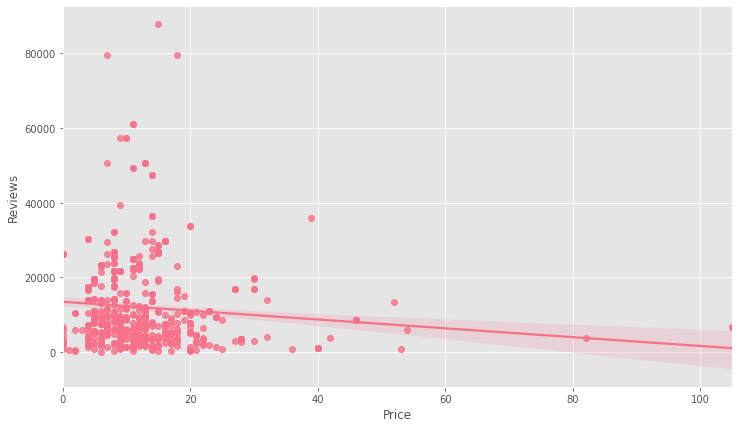

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi=72)
sns.regplot(data=first_import, x='Price', y='Reviews', ax=ax)
plt.show()

A relação acima tende a mostrar uma correlação similar ao do grafico abordado ante, mas como a maioria dos Bestsellers estão juntas em uma faixa de preço mais baixa, não conseguimos concluir muito.

## Podemos ver então a distribuição entre livros de Ficção e Não-Ficticio.


In [11]:
temp_df = first_import['Genre'].value_counts().reset_index()

# Creating trace1
trace1 = go.Bar(x = temp_df['index'],
                y= temp_df['Genre'],
                marker = dict(color='rgb(255,165, 0)',
                             line=dict(color='rgb(0,0,0)', width=1.5)))
layout = go.Layout(template = 'plotly_dark', xaxis = dict(title='Genre'), 
                  yaxis = dict(title='Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

## O grafico acima mostra que possui mais livre Não-Ficticios do que os Fictions na lista de top 50 da Amazon.

## Uma outra forma de visualizar essa distribuição é através de um gráfico de pizza.

In [12]:
# Creating a Function to plot a pie chart

def pie_plot(cnt_srs, colors, title):
        labels=cnt_srs.index
        values=cnt_srs.values
        trace = go.Pie(labels=labels,
                   values=values,
                   title=title,
                   hoverinfo='percent+value',
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                              line=dict(color='#000000', width=2),
                              )
                  )
        return trace

py.iplot([pie_plot(first_import['Genre'].value_counts(), ['magenta',
                                                         'cyan'], 'GENRE')])

## Sabendo disso podemos olhar para as distribuição das Ratings entre os dois tipos.


In [13]:
# Ratings by Genre

df1= first_import[first_import['Genre'] == 'Fiction']
df2= first_import[first_import['Genre'] == 'Non Fiction']

temp_df1=df1['User Rating'].value_counts().reset_index()
temp_df2=df2['User Rating'].value_counts().reset_index()

# Creating Trace1
trace1 = go.Bar( x = temp_df1['index'],
                 y = temp_df1['User Rating'],
                 name = 'Fiction',
                 marker=dict(color = 'rgb(249,6,6)',
                            line=dict(color='rgb(0,0,0)', width=1.5)))
#Creating Trace2
trace2 = go.Bar(x = temp_df2['index'],
                y = temp_df2['User Rating'],
                name = 'Non Fiction',
                marker=dict(color = 'rgb(26,118,255)', 
                            line=dict(color='rgb(0,0,0)', width=1.5))) 
                
#Creating the layout
layout = go.Layout(template='plotly_dark', title='Rating by Genre',
                   xaxis = dict(title = 'Rating'), yaxis= dict(title = 'Count'))
        
                
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

* Podemos observar que os livros de Não-Ficticios são mais dominantes nas notas abaixo 4.8, porém os livros do tipo Ficticio são mais dominantes nas notas de 4.8 e 4.9, esse é um ponto importante, visto que, esse dataset possui mais livros Não-Ficticios do que Fictios.

## Outras visualizações que podemos fazer é a de quantidade de avaliações, notas e preço ao longo dos anos.


In [14]:
temp_df1 = first_import.groupby('Year').mean().reset_index()

#Creating trace1 (first graph)

trace1 = go.Bar(x = temp_df1['Year'],
                y = temp_df1['Reviews'],
                marker = dict(color = 'rgb(255, 165, 0)',
                             line=dict(color = 'rgb(0,0,0)', width = 1.5)))


#Creating the layout for the first graph
layout = go.Layout(template = 'plotly_dark', 
                   title = 'Average Reviews Over The Years',
                   xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'))
                   
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

#Creating trace2 (second graph)
trace2 = go.Bar(x = temp_df1['Year'],
                y = temp_df1['Price'],
                marker = dict(color = 'rgb(148, 103, 189)',
                             line=dict(color = 'rgb(0,0,0)', width = 1.5)))


#Creating the layout for the second graph
layout2 = go.Layout(template = 'plotly_dark',
                   title = 'Average Price Over The Years',
                   xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Price'))

fig = go.Figure(data = [trace2], layout = layout2)
fig.show()

#Creating trace3 (third graph)
trace3 = go.Bar(x = temp_df1['Year'],
                y = temp_df2['User Rating'],
                marker = dict(color = 'rgb(250, 13, 92)',
                             line=dict(color='rgb(0,0,0)', width=1.5)))

# Creating the Layout for the Third Graph
layout3 = go.Layout(template = 'plotly_dark',
                    title = 'Average Rating Over The Years',
                    xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Rating'))
fig = go.Figure(data = [trace3], layout = layout3)
fig.show()

## Com esses tres gráficos podemos entender um pouco melhor a evolução do dataset ao longo dos anos.

### No primeiro gráfico onde olhamos a média de avaliações ao longo dos anos, podemos ver que durante os anos a quantidade the avaliações foram aumentando, em 2019 atigindo quase uma média de 16.000 avaliações.

### No segundo gráfico a média de preço durante os anos se mantem equilibrada durante o perído de 2010 à 2014, mas após 2014 começa a cair.

### No terceiro gráfico podemos ver que a média de notas vem caindo desde 2011.

## Podemos ver a distribuição dos Preços, Avaliações e Notas ao longo dos anos por genero.

In [18]:
df1 = first_import[first_import['Genre'] == 'Fiction']
df2 = first_import[first_import['Genre'] == 'Non Fiction']

temp_df1 = df1.groupby('Year').mean().reset_index()
temp_df2 = df2.groupby('Year').mean().reset_index()

# Creating trace1 and trace2 for the reviews by genre graph

trace1 = go.Bar(x = temp_df1['Year'],
                y = temp_df1['Reviews'],
                name = 'Fiction',
                marker = dict(color = 'rgb(246, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(x = temp_df2['Year'],
                y = temp_df2['Reviews'],
                name = 'Non Fiction',
                marker = dict(color = 'rgb(26, 118, 255)',
                             line=dict(color='rgb(0,0,0)', width=1.5)))

#Creating the Layout of the first graph
layout1 = go.Layout(template = 'plotly_dark',
                    title = 'Average Reviews By Genre Over The Years',
                    xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'))

fig = go.Figure(data = [trace1, trace2], layout = layout1)
fig.show()

# Creating trace3 and trace4 for the Price by Genre Grahp

trace3 = go.Bar(x = temp_df1['Year'],
                y = temp_df1['Price'],
                name = 'Fiction',
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color = 'rgb(0,0,0)', width=1.5)))

trace4 = go.Bar(x = temp_df2['Year'],
                y = temp_df2['Price'],
                name = 'Non Fiction',
                marker = dict(color = 'rgb(26, 118, 255)',
                             line=dict(color = 'rgb(0,0,0)', width=1.5)))

#Creating the Layout for the second graph
layout2 = go.Layout(template = 'plotly_dark',
                    title = 'Average Price By Genre Over The Years',
                    xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Price'))

fig = go.Figure(data = [trace3, trace4], layout = layout2)
fig.show()

# Creating trace5 and trace6 for the ratings graph

trace5 = go.Bar(x = temp_df1['Year'],
                y = temp_df1['User Rating'],
                name = 'Fiction',
                marker = dict(color = 'rgb(249, 6, 6)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5)))

trace6 = go.Bar(x = temp_df2['Year'],
                y = temp_df2['User Rating'],
                name = 'Non Fiction',
                marker = dict(color = 'rgb(26, 118, 255)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5)))

# Creating the Layout for the third graph
layout3 = go.Layout(template = 'plotly_dark',
                    title = 'Average Ratings By Genre Over The Years',
                    xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Ratings'))

fig = go.Figure(data = [trace5, trace6], layout = layout3)
fig.show()

## Autores com BestSellers em ambos os generos: Ficção e Não-Ficticio

In [19]:
first_import[first_import['Author'].isin(list(first_import.groupby(['Author', 'Genre']).count().reset_index()['Author'].value_counts()[:2].index))]

,Name,Author,User Rating,Reviews,Price,Year,Genre
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
158,Harry Potter Coloring Book,Scholastic,4.7,3564,9,2015,Non Fiction
268,Pokémon Deluxe Essential Handbook: The Need-to...,Scholastic,4.7,3503,9,2016,Fiction
514,Ultimate Sticker Book: Frozen: More Than 60 Re...,DK,4.5,2586,5,2014,Fiction


## Gráficos mostrando a evolução ao long dos anos das avaliações, notas e preço por genero ao longo dos anos.

In [20]:
df1 = first_import[first_import['Genre'] == 'Fiction']
df2 = first_import[first_import['Genre'] == 'Non Fiction']

temp_df1 = df1.groupby('Year').mean().reset_index()
temp_df2 = df2.groupby('Year').mean().reset_index()

# Creating Trace1 and Trace2 for the first graph
trace1 = go.Scatter(x = temp_df1['Year'],
                    y = temp_df1['Price'],
                    name = 'Fiction',
                    marker = dict(color = 'rgb(249, 6, 6)',
                                 line = dict(color = 'rgb(0,0,0)', width = 1.5)))
trace2 = go.Scatter(x = temp_df2['Year'],
                    y = temp_df2['Price'],
                    name = 'Non Fiction',
                    marker = dict(color = 'rgb(26, 118, 255)',
                                 line = dict(color = 'rgb(0,0,0)', width = 1.5)))

#Creating the Layout for the First Graph
layout1 = go.Layout(hovermode = 'closest',
                    title = 'Average Price Over The Years',
                    xaxis = dict(title = 'Year'),
                    yaxis = dict(title = 'Average Price'),
                    template = 'plotly_dark')

fig = go.Figure(data = [trace1, trace2], layout = layout1)
fig.show()

# Creating Trace3 and Trace4 for the second graph
trace3 = go.Scatter(x = temp_df1['Year'],
                    y = temp_df1['User Rating'],
                    name = 'Fiction',
                    marker = dict(color = 'rgb(249, 6, 6)',
                                 line = dict(color = 'rgb(0,0,0)', width = 1.5)))

trace4 = go.Scatter(x = temp_df2['Year'],
                    y = temp_df2['User Rating'],
                    name = 'Non Fiction',
                    marker = dict(color = 'rgb(26, 118, 255)',
                                 line = dict(color = 'rgb(0,0,0)', width = 1.5)))

#Creating the Layout for the Second Graph
layout2 = go.Layout(hovermode = 'closest',
                    title = 'Average Ratings Over The Years',
                    xaxis = dict(title = 'Year'),
                    yaxis = dict(title = 'Average Ratings'),
                    template = 'plotly_dark')

fig = go.Figure(data = [trace3, trace4], layout = layout2)
fig.show()


#Creating Trace5 and Trace6 for the Third Graph
trace5 = go.Scatter(x = temp_df1['Year'],
                    y = temp_df1['Reviews'],
                    name = 'Fiction',
                    marker = dict(color ='rgb(249, 6, 6)',
                                 line = dict(color = 'rgb(0,0,0)', width = 1.5)))

trace6 = go.Scatter(x = temp_df2['Year'],
                    y = temp_df2['Reviews'],
                    name = 'Non Fiction',
                    marker = dict(color = 'rgb(26, 118, 255)',
                                 line = dict(color = 'rgb(0,0,0)', width = 1.5)))

#Creating the Layout for the third graph
layout3 = go.Layout(hovermode = 'closest',
                    title = 'Average Reviews Over The Years',
                    xaxis = dict(title = 'Year'),
                    yaxis = dict(title = 'Average Reviews'),
                    template = 'plotly_dark')
fig = go.Figure(data = [trace5, trace6], layout = layout3)
fig.show()